In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, confusion_matrix, classification_report
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
SEED = 61
np.random.randome = SEED

In [7]:
df = pd.read_csv('../datasets/train.csv')

In [8]:
mainTest = pd.read_csv('../datasets/test.csv')

In [9]:
df.columns

Index(['blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills',
       'blueDeaths', 'blueAssists', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'blueWins'],
      dtype='object')

### PreScaling Data

In [10]:
X = df.loc[:, ~df.columns.isin(['blueFirstBlood', 'blueWins'])]
y = df['blueWins']
firstBld = df['blueFirstBlood']

In [11]:
X1 = mainTest.loc[:, ~mainTest.columns.isin(['blueFirstBlood', 'blueWins'])]
y1 = mainTest['blueWins']
firstBld1 = mainTest['blueFirstBlood']

In [12]:
X.columns

Index(['blueWardsPlaced', 'blueWardsDestroyed', 'blueKills', 'blueDeaths',
       'blueAssists', 'blueDragons', 'blueHeralds', 'blueTowersDestroyed',
       'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience',
       'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled',
       'redWardsPlaced', 'redWardsDestroyed', 'redAssists', 'redDragons',
       'redHeralds', 'redTowersDestroyed', 'redTotalGold', 'redAvgLevel',
       'redTotalExperience', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled'],
      dtype='object')

In [13]:
ss = StandardScaler()
mm = MinMaxScaler()

In [14]:
Xstd = ss.fit_transform(X)
Xmm = mm.fit_transform(X)

In [15]:
df_ss = pd.DataFrame(Xstd, columns=X.columns)
df_mm = pd.DataFrame(Xmm, columns=X.columns)

In [16]:
df_ss = pd.concat([df_ss, firstBld], axis=1)
df_mm = pd.concat([df_mm, firstBld], axis=1)

In [17]:
ss1 = StandardScaler()
mm1 = MinMaxScaler()

test_ss = ss1.fit_transform(X1)
test_mm = mm1.fit_transform(X1)

test_ss = pd.DataFrame(test_ss, columns=X1.columns)
test_mm = pd.DataFrame(test_mm, columns=X1.columns)

test_ss = pd.concat([test_ss, firstBld1], axis=1)
test_mm = pd.concat([test_mm, firstBld1], axis=1)

## Unscaled Data

In [18]:
steps = {
    'dummy': [('dummy', DummyClassifier())],
    'svc': [('svc', SVC())],
    'log': [('log', LogisticRegression())],
    'rmf': [('rmf', RandomForestClassifier())],
    'knn': [('knn', KNeighborsClassifier())],
    'tree': [('tree', DecisionTreeClassifier())]
}

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns!='blueWins'], df['blueWins'], test_size=0.3, stratify=df['blueWins'], random_state=SEED)

In [20]:
print('Labels counts in y:', np.bincount(df['blueWins']))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [3464 3451]
Labels counts in y_train: [2425 2415]
Labels counts in y_test: [1039 1036]


In [21]:
pipe = {}
for key in steps.keys():
    pipe[key] = Pipeline(steps[key])
    pipe[key].fit(X_train, y_train)
    print('[{}] Classification accuracy without selecting features: {:.3f}'
      .format(key, pipe[key].score(X_test, y_test)))
    
    

[dummy] Classification accuracy without selecting features: 0.506


/home/hades/anaconda3/envs/test101/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


[svc] Classification accuracy without selecting features: 0.727
[log] Classification accuracy without selecting features: 0.727
[rmf] Classification accuracy without selecting features: 0.727
[knn] Classification accuracy without selecting features: 0.695
[tree] Classification accuracy without selecting features: 0.637


### Standard Scaled Data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_ss, y, test_size=0.3, stratify=y, random_state=SEED)

In [23]:
print('Labels counts in y:', np.bincount(df['blueWins']))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [3464 3451]
Labels counts in y_train: [2425 2415]
Labels counts in y_test: [1039 1036]


In [24]:
steps = {
    'dummy': [('dummy', DummyClassifier())],
    'svc': [('svc', SVC())],
    'log': [('log', LogisticRegression())],
    'rmf': [('rmf', RandomForestClassifier())],
    'knn': [('knn', KNeighborsClassifier())],
    'tree': [('tree', DecisionTreeClassifier())]
}

In [25]:
sspipe = {}
for key in steps.keys():
    sspipe[key] = Pipeline(steps[key])
    sspipe[key].fit(X_train, y_train)
    print('[{}] Classification accuracy without selecting features: {:.3f}'
      .format(key, sspipe[key].score(X_test, y_test)))

[dummy] Classification accuracy without selecting features: 0.493


/home/hades/anaconda3/envs/test101/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


[svc] Classification accuracy without selecting features: 0.727
[log] Classification accuracy without selecting features: 0.734
[rmf] Classification accuracy without selecting features: 0.721
[knn] Classification accuracy without selecting features: 0.686
[tree] Classification accuracy without selecting features: 0.628


### MinMax

In [26]:
steps = {
    'dummy': [('dummy', DummyClassifier())],
    'svc': [('svc', SVC())],
    'log': [('log', LogisticRegression())],
    'rmf': [('rmf', RandomForestClassifier())],
    'knn': [('knn', KNeighborsClassifier())],
    'tree': [('tree', DecisionTreeClassifier())]
}

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df_mm, y, test_size=0.3, stratify=y, random_state=SEED)

In [28]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [3464 3451]
Labels counts in y_train: [2425 2415]
Labels counts in y_test: [1039 1036]


In [29]:
mmpipe = {}
for key in steps.keys():
    mmpipe[key] = Pipeline(steps[key])
    mmpipe[key].fit(X_train, y_train)
    print('[{}] Classification accuracy without selecting features: {:.3f}'
      .format(key, mmpipe[key].score(X_test, y_test)))

[dummy] Classification accuracy without selecting features: 0.502


/home/hades/anaconda3/envs/test101/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


[svc] Classification accuracy without selecting features: 0.735
[log] Classification accuracy without selecting features: 0.739
[rmf] Classification accuracy without selecting features: 0.723
[knn] Classification accuracy without selecting features: 0.678
[tree] Classification accuracy without selecting features: 0.629


### Conclusion on First Run

__Logistic Regression seems to pull ahead with scaled or unscaled data__

*Accuracy Score Table*

|                 |  Dummy | SVC    | Logistic | RandomForest | KNN     | DecisionTree |
| :-------------: | :----: | :----: | :------: | :----------: | :-----: | :----------: |
| UnScaled        | 52.4%  | 72.7%  | 72.7%    | 72.5%        | 69.5%   | 63.2%        |
| Standard Scaler | 49.5%  | 72.7%  | 73.4%    | 71.6%        | 68.6%   | 62.6%        |
| MinMax Scale    | 49.4%  | 73.5%  | 73.9%    | 72.1%        | 67.8%   | 63.0%        |

Feature Importance with random Forests

In [30]:
def featureImp(importance, title):
    cols = X_train.columns
    collen = len(cols)
    indices = np.argsort(importance)[::-1]
#     print(len(importance))
#     print(len(indices))
#     print(collen)
#     for ind in range(collen):
# #         print(ind)
#         print("%2d) %-*s %f" % (ind + 1, 30, cols[indices[ind]], importance[indices[ind]]))
#         print(ind)
#         print('{} title {}'.format(ind, cols[ind]))
    y_ticks = np.arange(0, collen)
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.barh(y_ticks, importance[indices])
    ax.set_yticklabels(cols[indices])
    ax.set_yticks(y_ticks)
    ax.set_title(title)
    fig.tight_layout()
    plt.show()
#     print(indices)
#     plt.figure(figsize= (10,5))
#     print(cols[indices])
#     plt.title('Feature Importance')

#     plt.barh(range(collen), importance[indices], align='center')

#     plt.yticks(range(collen), cols[indices], rotation=0)

#     plt.ylim([-1, len(cols)])

#     plt.tight_layout()
#     plt.show()

In [31]:
feature_importances = np.column_stack((pipe['rmf']['rmf'].feature_importances_, sspipe['rmf']['rmf'].feature_importances_, mmpipe['rmf']['rmf'].feature_importances_))

In [32]:
featuredf = pd.DataFrame(feature_importances, columns=['Unscaled', 'StandardScaler', 'MinMax'])

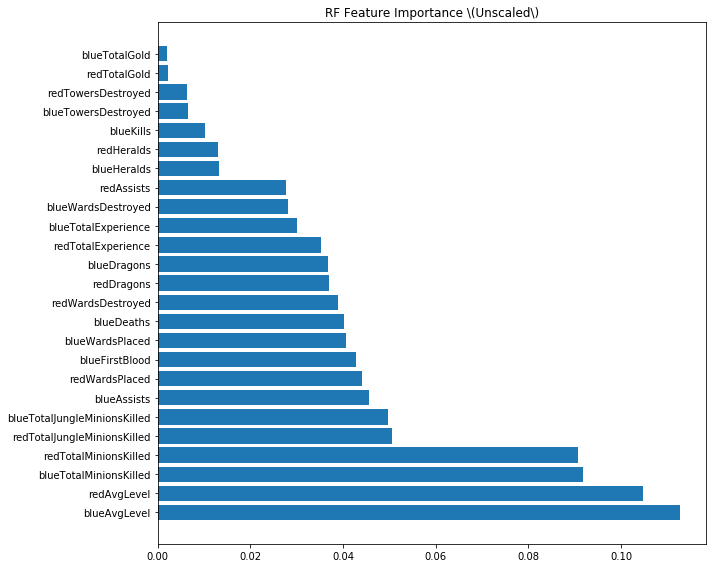

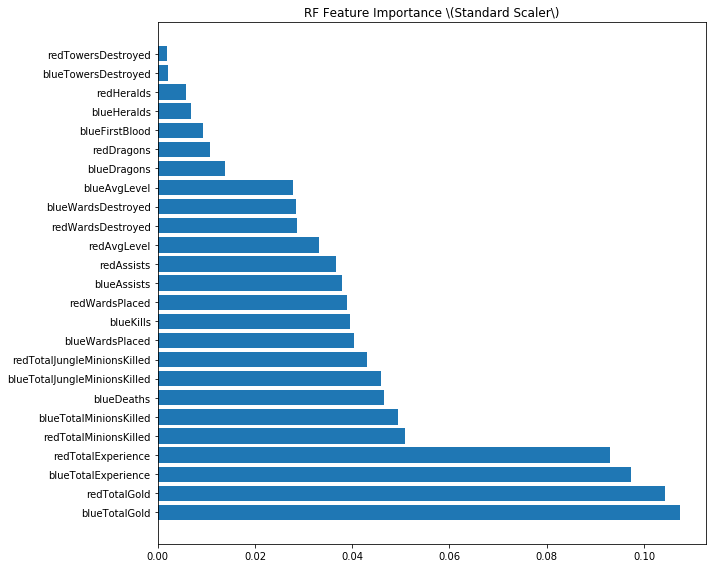

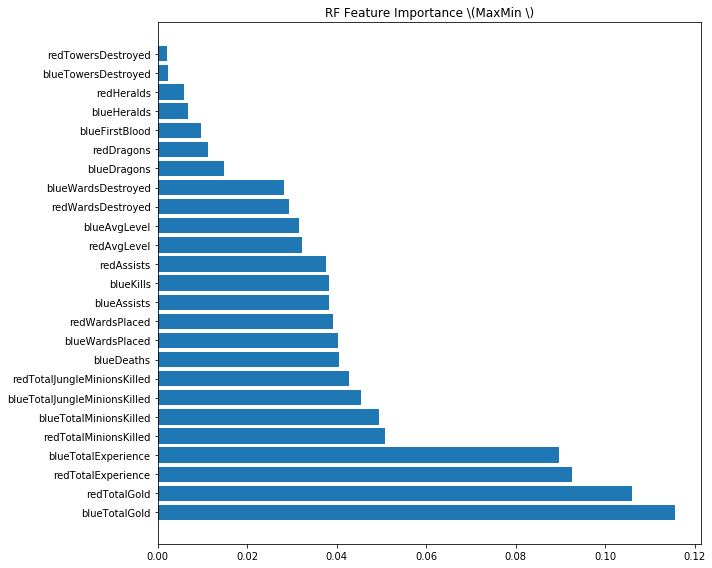

In [33]:
# Unscaled Data
# print(X.columns)
featureImp(pipe['rmf']['rmf'].feature_importances_, 'RF Feature Importance \(Unscaled\)')
featureImp(sspipe['rmf']['rmf'].feature_importances_, 'RF Feature Importance \(Standard Scaler\)')
featureImp(mmpipe['rmf']['rmf'].feature_importances_, 'RF Feature Importance \(MaxMin \)')

## Testing on Test Data

In [34]:
# df.loc[:, df.columns!='blueWins'], df['blueWins']
for key in pipe.keys():
    print('[{}] Classification accuracy without selecting features: {:.3f}'
      .format(key, pipe[key].score(mainTest.loc[:, mainTest.columns != 'blueWins'], mainTest['blueWins'])))

[dummy] Classification accuracy without selecting features: 0.510
[svc] Classification accuracy without selecting features: 0.737
[log] Classification accuracy without selecting features: 0.738
[rmf] Classification accuracy without selecting features: 0.731
[knn] Classification accuracy without selecting features: 0.680
[tree] Classification accuracy without selecting features: 0.626


In [35]:
for key in sspipe.keys():
    print('[{}] Classification accuracy without selecting features: {:.3f}'
      .format(key, sspipe[key].score(test_ss, y1)))

[dummy] Classification accuracy without selecting features: 0.502
[svc] Classification accuracy without selecting features: 0.730
[log] Classification accuracy without selecting features: 0.733
[rmf] Classification accuracy without selecting features: 0.732
[knn] Classification accuracy without selecting features: 0.684
[tree] Classification accuracy without selecting features: 0.629


In [36]:
for key in mmpipe.keys():
    print('[{}] Classification accuracy without selecting features: {:.3f}'
      .format(key, mmpipe[key].score(test_mm, y1)))

[dummy] Classification accuracy without selecting features: 0.495
[svc] Classification accuracy without selecting features: 0.717
[log] Classification accuracy without selecting features: 0.711
[rmf] Classification accuracy without selecting features: 0.709
[knn] Classification accuracy without selecting features: 0.682
[tree] Classification accuracy without selecting features: 0.621


## PCA

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df_ss, y, test_size=0.3, stratify=y, random_state=SEED)

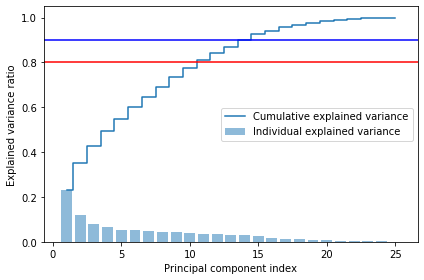

In [38]:
cov_mat = np.cov(X_train.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,26), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,26), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.axhline(y=0.8, color='r', linestyle='-')
plt.axhline(y=0.9, color='b', linestyle='-')
plt.tight_layout()
plt.show()

*To explain 80% variance of the data more than 10 components are required. And to explain 90% it requires 14 components.*

In [39]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))

In [40]:
X_train_pca = X_train.dot(w)

In [42]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.3,
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl, s= 10)

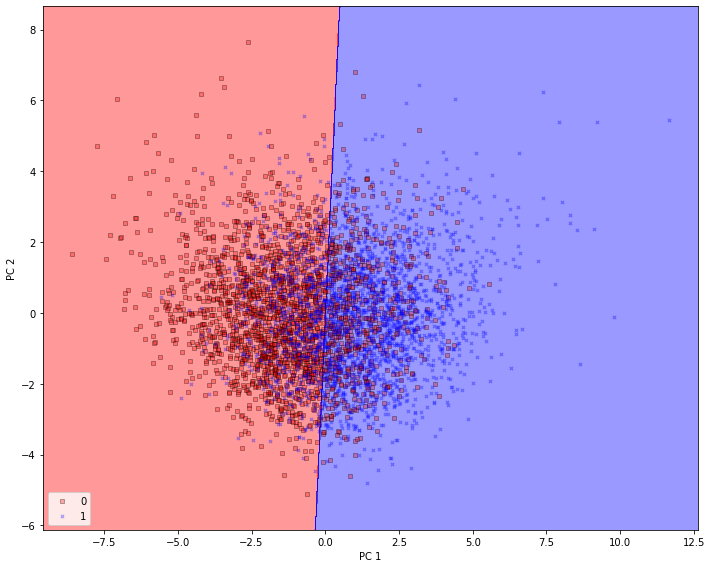

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# initializing the PCA transformer and
# logistic regression estimator:
pca = PCA(n_components=2)
lr = LogisticRegression(random_state=42)

# dimensionality reduction:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
# fitting the logistic regression model on the reduced dataset:
lr.fit(X_train_pca, y_train)

plt.figure(figsize=(10,8))
plot_decision_regions(X_train_pca, y_train, classifier=lr)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

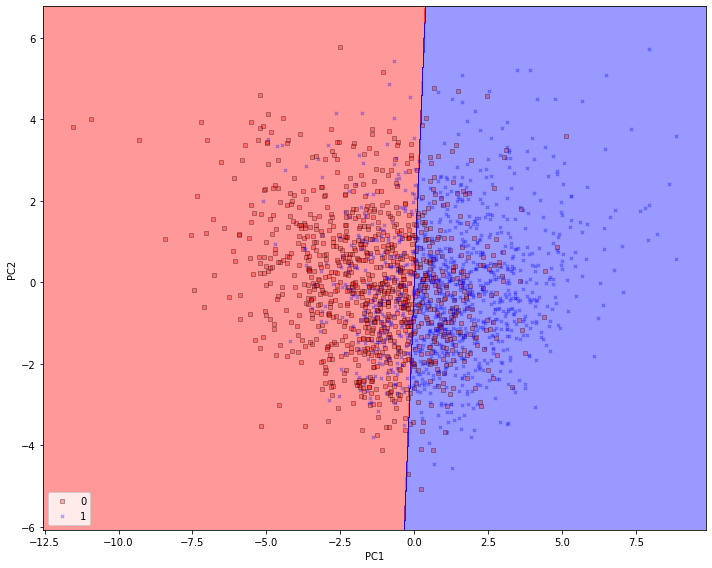

In [44]:
plt.figure(figsize=(10,8))
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

## Classification LDA

In [45]:
np.set_printoptions(precision=4)
X_train_std = X_train.to_numpy()
mean_vecs = []
for label in range(0,2):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
    print('MV %s: %s\n' %(label, mean_vecs[label-1]))

MV 0: [-0.0092 -0.0436 -0.3158  0.3389 -0.2464 -0.2089 -0.0716 -0.1228 -0.3965
 -0.3349 -0.3758 -0.2267 -0.1229  0.0273  0.0569  0.283   0.2013  0.0723
  0.0875  0.407   0.358   0.3838  0.208   0.1155  0.4033]

MV 1: [-0.0092 -0.0436 -0.3158  0.3389 -0.2464 -0.2089 -0.0716 -0.1228 -0.3965
 -0.3349 -0.3758 -0.2267 -0.1229  0.0273  0.0569  0.283   0.2013  0.0723
  0.0875  0.407   0.358   0.3838  0.208   0.1155  0.4033]



In [46]:
d = 25 # number of features

S_W = np.zeros((d, d))
for label, mv in zip(range(0, 2), mean_vecs):
    class_scatter = np.zeros((d, d))

for row in X_train_std[y_train == label]:
    row, mv = row.reshape(d, 1), mv.reshape(d, 1)
    class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter

print('Within-class scatter matrix: %sx%s' % ( S_W.shape[0], S_W.shape[1]))


Within-class scatter matrix: 25x25


In [47]:
 print('Class label distribution: %s' 
       % np.bincount(y_train))

Class label distribution: [2425 2415]


In [48]:
d = 25 # number of features

S_W = np.zeros((d, d))

for label,mv in zip(range(0, 2), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter

print('Scaled within-class scatter matrix: %sx%s'
        % (S_W.shape[0], S_W.shape[1]))

Scaled within-class scatter matrix: 25x25


In [49]:
mean_overall = np.mean(X_train_std, axis=0)

d = 25 # number of features

S_B = np.zeros((d, d))

for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1) # make column vector
    mean_overall = mean_overall.reshape(d, 1)
    S_B += n * (mean_vec - mean_overall).dot(
    (mean_vec - mean_overall).T)
print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 25x25


In [50]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [51]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

print('Eigenvalues in descending order:\n')

for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

455.3388166988832
1.0092435301874656e-12
8.261360329677005e-13
8.261360329677005e-13
6.772193461018064e-13
2.9574204786819156e-13
2.9574204786819156e-13
1.9792573614703075e-13
1.8652311656745798e-13
1.8652311656745798e-13
1.118969669196991e-13
1.118969669196991e-13
8.070745640211005e-14
8.070745640211005e-14
5.638589159112176e-14
5.638589159112176e-14
3.9423048620396975e-14
3.9423048620396975e-14
2.3007749937386383e-14
9.15130715035284e-15
6.232082538961704e-15
6.232082538961704e-15
2.476444962510234e-15
1.991264087950623e-15
0.0


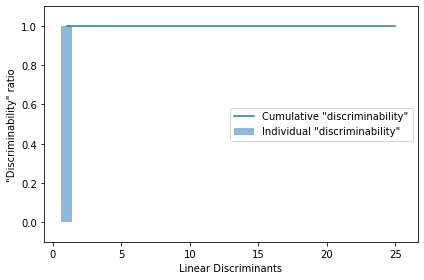

In [52]:
tot = sum(eigen_vals.real)

discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]

cum_discr = np.cumsum(discr)
plt.bar(range(1, 26), discr, alpha=0.5, align='center', label='Individual "discriminability"')

plt.step(range(1, 26), cum_discr, where='mid', label='Cumulative "discriminability"')

plt.ylabel('"Discriminability" ratio')

plt.xlabel('Linear Discriminants')

plt.ylim([-0.1, 1.1])

plt.legend(loc='best')

plt.tight_layout()

plt.show()

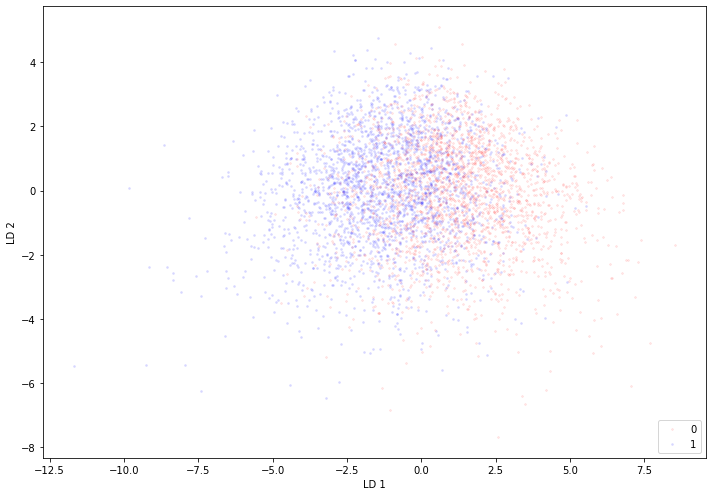

In [53]:
X_train_lda = X_train_std.dot(w)

colors = ['r', 'b']
markers = ['x', 'o']

plt.figure(figsize=(10,7))

for l, c, m in zip(np.unique(y_train), colors, markers):
     plt.scatter(X_train_lda[y_train==l, 0], X_train_lda[y_train==l, 1] * (-1),
    c=c, label=l, marker=m, s=3, alpha=0.1)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [54]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator
class MajorityVoteClassifier(BaseEstimator,
                             ClassifierMixin):
    """ A majority vote ensemble classifier
    
    Parameters
    ----------
    classifiers : array-like, shape = [n_classifiers]
      Different classifiers for the ensemble
    
    vote : str, {'classlabel', 'probability'}
      Default: 'classlabel'
      If 'classlabel' the prediction is based on
      the argmax of class labels. Else if
      'probability', the argmax of the sum of
      probabilities is used to predict the class label
      (recommended for calibrated classifiers).
    
    weights : array-like, shape = [n_classifiers]
      Optional, default: None
      If a list of `int` or `float` values are
      provided, the classifiers are weighted by
      importance; Uses uniform weights if `weights=None`.
    
    """
    def __init__(self, classifiers,
                 vote='classlabel', weights=None):
        
        self.classifiers = classifiers
        self.named_classifiers = {key: value for
                                  key, value in
                                  _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights
        
    def fit(self, X, y):
        """ Fit classifiers.
        
        Parameters
        ----------
        X : {array-like, sparse matrix},
            shape = [n_examples, n_features]
            Matrix of training examples.
        
        y : array-like, shape = [n_examples]
            Vector of target class labels.
        
        Returns
        -------
        self : object
        
        """
        if self.vote not in ('probability', 'classlabel'):
            raise ValueError("vote must be 'probability'"
                             "or 'classlabel'; got (vote=%r)"
                             % self.vote)
        if self.weights and len(self.weights) != len(self.classifiers):
            raise ValueError("Number of classifiers and weights"
                             "must be equal; got %d weights,"
                             "%d classifiers"
                             % (len(self.weights),
                             len(self.classifiers)))
        # Use LabelEncoder to ensure class labels start
        # with 0, which is important for np.argmax
        # call in self.predict
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X,
                               self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self
    
    def predict(self, X):
        """ Predict class labels for X.
        
        Parameters
        ----------
        X : {array-like, sparse matrix},
            Shape = [n_examples, n_features]
            Matrix of training examples.
        
        Returns
        ----------
        maj_vote : array-like, shape = [n_examples]
            Predicted class labels.
        
        """
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else: # 'classlabel' vote
            
            # Collect results from clf.predict calls
            predictions = np.asarray([clf.predict(X)
                                      for clf in
                                      self.classifiers_]).T
            
            maj_vote = np.apply_along_axis(lambda x: np.argmax(
                                           np.bincount(x,
                                           weights=self.weights)),
                                           axis=1,
                                           arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote
    
    def predict_proba(self, X):
        """ Predict class probabilities for X.
        
        Parameters
        ----------
        X : {array-like, sparse matrix}, 
            shape = [n_examples, n_features]
            Training vectors, where
            n_examples is the number of examples and
            n_features is the number of features.
        
        Returns
        ----------
        avg_proba : array-like,
            shape = [n_examples, n_classes]
            Weighted average probability for
            each class per example.
        
        """
        probas = np.asarray([clf.predict_proba(X)
                             for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0,
                               weights=self.weights)
        return avg_proba
    
    def get_params(self, deep=True):
        """ Get classifier parameter names for GridSearch"""
        if not deep:
            return super(MajorityVoteClassifier, 
                           self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in self.named_classifiers.items():
                for key, value in step.get_params(
                        deep=True).items():
                    out['%s__%s' % (name, key)] = value
            return out

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

clf1 = LogisticRegression(random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = KNeighborsClassifier()
clf4 = RandomForestClassifier(random_state=42)
clf5 = SVC(random_state=42, probability = True)

pipe1 = Pipeline([['sc', StandardScaler()], ['clf', clf1]])
pipe3 = Pipeline([['sc', StandardScaler()], ['clf', clf3]])
pipe5 = Pipeline([['sc', StandardScaler()], ['clf', clf5]])
mv_clf = MajorityVoteClassifier(classifiers=[pipe1, clf2, pipe3, clf4, pipe5])
    
clf_labels = ['Logistic regression', 'Decision tree', 'KNN', 'RandomForestClassifier', 'SVM', 'mv_clf']

print('10-fold cross validation:\n')
for clf, label in zip([pipe1, clf2, pipe3, clf4, pipe5, mv_clf], clf_labels):
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.80 (+/- 0.02) [Logistic regression]
ROC AUC: 0.62 (+/- 0.02) [Decision tree]
ROC AUC: 0.73 (+/- 0.02) [KNN]
ROC AUC: 0.79 (+/- 0.02) [RandomForestClassifier]
ROC AUC: 0.78 (+/- 0.02) [SVM]
ROC AUC: 0.78 (+/- 0.02) [mv_clf]


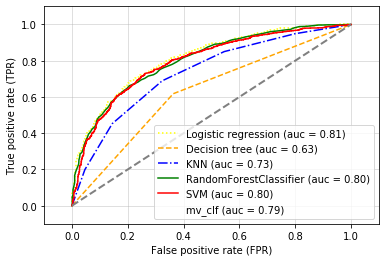

In [56]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

colors = ['yellow', 'orange', 'b', 'green', 'r', 'black']
all_clf = [pipe1, clf2, pipe3, clf4, pipe5, mv_clf]
linestyles = [':', '--', '-.', '-', 'solid', '']


for clf, label, clr, ls \
    in zip(all_clf, clf_labels, colors, linestyles):
    # assuming the label of the positive class is 1
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, color=clr, linestyle=ls, label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.show()

In [67]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(random_state=42, C = 1)

param_grid = {'C': [0.001, 0.1, 10, 100.0]}

lr_cv = GridSearchCV(lr, param_grid, cv=10)
lr_cv.fit(X_train, y_train)

print(lr_cv.best_params_) 
print(lr_cv.best_score_)

{'C': 0.1}
0.7303719008264464


In [68]:
param_grid = {'n_neighbors': np.arange(1,25)} 

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=10) 

knn_cv.fit(X_train,y_train) 
print(knn_cv.best_params_) 
print(knn_cv.best_score_)

{'n_neighbors': 24}
0.7039256198347108


In [69]:
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(PCA(n_components=2),
                        LogisticRegression(random_state=42, solver='lbfgs'))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.728


In [70]:
pipe_svc = make_pipeline(SVC(random_state=42))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 'svc__kernel': ['linear']},
              {'svc__C': param_range,'svc__gamma': param_range,'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy',cv=10,refit=True,n_jobs=-1)

gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.7276859504132231
{'svc__C': 10.0, 'svc__kernel': 'linear'}


In [71]:
from sklearn.naive_bayes import GaussianNB

gaus = Gaussmake_pipelinegaus.fit(X_train, y_train)

ypred = gaus.predict(X_test)

# get the accuracy score
acc_nb = accuracy_score(ypred, y_test)
print(acc_nb)

0.7253012048192771


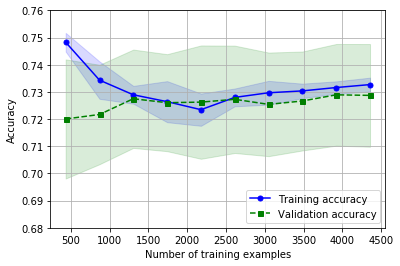

In [61]:
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(LogisticRegression(random_state= 42, C=0.1))


train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,X=X_train,
                                    y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes,train_mean + train_std, train_mean - train_std,alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,color='green', linestyle='--', marker='s', markersize=5,label='Validation accuracy')

plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()

plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.68, 0.76])
plt.show()

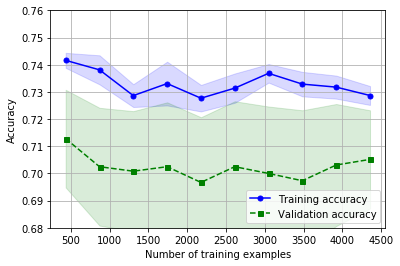

In [62]:
pipe_knn = make_pipeline(KNeighborsClassifier(n_neighbors=23))


train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_knn,X=X_train,
                                    y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes,train_mean + train_std, train_mean - train_std,alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,color='green', linestyle='--', marker='s', markersize=5,label='Validation accuracy')

plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()

plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.68, 0.76])
plt.show()

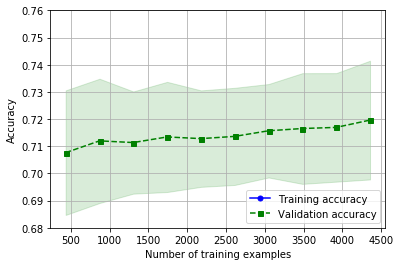

In [63]:
svm_lr = make_pipeline(SVC(random_state= 42, C=100.0))


train_sizes, train_scores, test_scores = learning_curve(estimator=svm_lr, X=X_train,
                                    y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes,train_mean + train_std, train_mean - train_std,alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,color='green', linestyle='--', marker='s', markersize=5,label='Validation accuracy')

plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()

plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.68, 0.76])
plt.show()

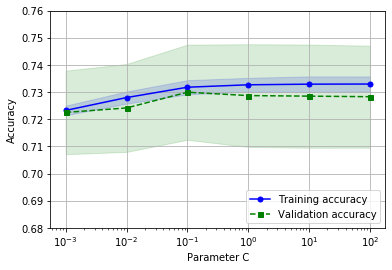

In [64]:
from sklearn.model_selection import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=pipe_lr,X=X_train,
                            y=y_train, param_name='logisticregression__C', param_range=param_range,cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o',markersize=5, label='Training accuracy')
plt.fill_between(param_range, train_mean + train_std,train_mean - train_std, alpha=0.15, color='blue')

plt.plot(param_range, test_mean,  color='green', linestyle='--', marker='s', markersize=5,label='Validation accuracy')

plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.68, 0.76])
plt.show()

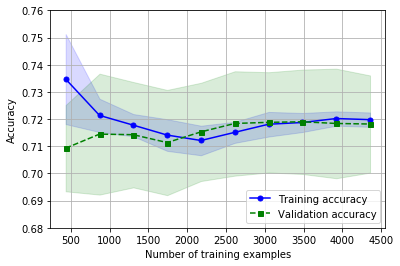

In [72]:
pipe_gaus = make_pipeline(GaussianNB())


train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_gaus,X=X_train,
                                    y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes,train_mean + train_std, train_mean - train_std,alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,color='green', linestyle='--', marker='s', markersize=5,label='Validation accuracy')

plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()

plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.68, 0.76])
plt.show()

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(random_state=42, C=0.1) # Optimal Logistic Regression
clf2 = GaussianNB()
# clf4 = RandomForestClassifier(random_state=42)
clf5 = SVC(random_state=42, probability = True, C=100.0, kernel='linear')

voting_clf = VotingClassifier(estimators=[('lr', clf1), ('gaussian', clf2), ('svc', clf5)])

voting_clf.fit(X_train, y_train)
print('Accuracty : {}'.format(voting_clf.score(X_test, y_test)))
# print("ROC AUC: %0.2f (+/- %0.2f) [%s]" 
#         % (scores.mean(), scores.std(), label))

Accuracty : 0.7330120481927711


### Using Real Test Set

In [78]:
y_test_pred = voting_clf.predict(test_ss)
print('Accuracy :  {}'.format(accuracy_score(y1, y_test_pred)))

Accuracy :  0.7365047233468286
